In [ ]:
!pip install opencv-python tensorflow fastapi uvicorn streamlit kaggle matplolib

ERROR: Ignored the following versions that require a different python version: 0.55.2 Requires-Python <3.5
ERROR: Could not find a version that satisfies the requirement matplolib (from versions: none)
ERROR: No matching distribution found for matplolib


In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d asdasdasasdas/garbage-classification
!unzip garbage-classification.zip -d garbage_data

Streaming output truncated to the last 5000 lines.
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: garbage_data/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: garbage_data/Garbage classif

In [ ]:
#Setting up the directory
import os
base_dir="garbage_data/Garbage classification/Garbage classification"
print("Classes available:",os.listdir(base_dir))

Classes available: ['cardboard', 'metal', 'paper', 'glass', 'trash', 'plastic']


In [ ]:
#Optimizing the Images for model building
import tensorflow as tf

batch_size=32
img_size=(224,224)

train_ds=tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
class_names=train_ds.class_names
print("Class names:",class_names)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


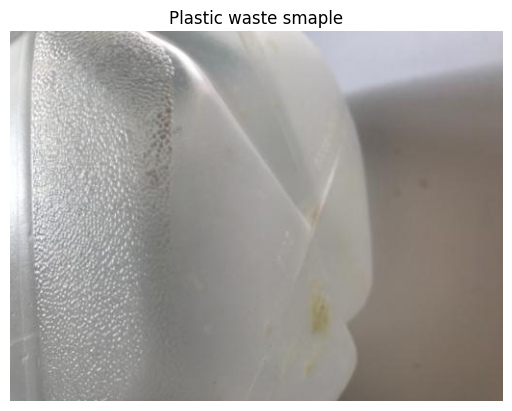

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

image_path=f'{base_dir}/plastic/plastic55.jpg'
img=cv2.imread(image_path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Plastic waste smaple")
plt.axis("off")
plt.show()

In [ ]:
AUTOTUNE= tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)


**Data Preprocessing and Understanding**

1.Undestanding the data structure
2.Processing
1.   resize
2.   Normalize
3.   Augument


  
  


In [ ]:
classes=os.listdir(base_dir)
num_classes=len(classes)
print(f"Number of classes:{num_classes}")

total_images=0
for c in classes:
  images=os.listdir(os.path.join(base_dir,c))
  total_images+=len(images)
  print(f"for category {c},We have {len(images)} images")

print(f"Total images:{total_images}") #Total images:2527

Number of classes:6
for category cardboard,We have 403 images
for category metal,We have 410 images
for category paper,We have 594 images
for category glass,We have 501 images
for category trash,We have 137 images
for category plastic,We have 482 images
Total images:2527


In [ ]:
#Model Building
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers,models

base_model=MobileNetV2(input_shape=img_size+(3,),include_top=False,weights="imagenet")

base_model.trainable=False #Freeze the base model

model=models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(6,activation="softmax") #6 Classes
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# | Step | Task                   | Analogy                                   |
# | ---- | ---------------------- | ----------------------------------------- |
# | 1    | Build the CNN model    | Design the brain structure (like neurons) |
# | 2    | Compile the model      | Set rules for learning (optimizer & loss) |
# | 3    | Train the model        | Teach the AI using flashcards (images)    |
# | 4    | Evaluate the model     | Give the AI a small test                  |
# | 5    | Save the trained model | Save the brain for future use (API & App) |


In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_ds,validation_data=val_ds, epochs=25)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4244 - loss: 1.5162 - val_accuracy: 0.6158 - val_loss: 1.0074
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6189 - loss: 1.0255 - val_accuracy: 0.6297 - val_loss: 0.9368
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6889 - loss: 0.8399 - val_accuracy: 0.6733 - val_loss: 0.8741
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7189 - loss: 0.7490 - val_accuracy: 0.6673 - val_loss: 0.9035
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7234 - loss: 0.7281 - val_accuracy: 0.7188 - val_loss: 0.7886
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7793 - loss: 0.6097 - val_accuracy: 0.6911 - val_loss: 0.8022
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7808 - loss: 0.6083 - val_accuracy: 0.6990 - val_loss: 0.8170
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8087 - loss: 0.5288 - val_accuracy: 0.7050 - val_lo

In [ ]:
#Saving your model
model.save('waste_classifier_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('waste_classifier_model.h5')

Saving metal29.jpg to metal29.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


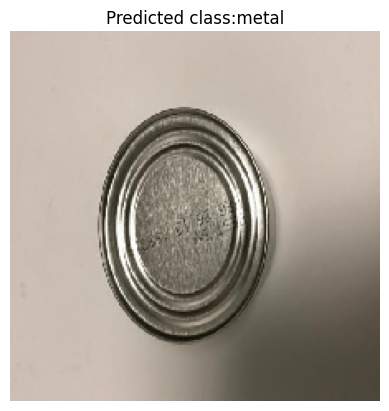

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#Load the trained the model
model=tf.keras.models.load_model("waste_classifier_model.h5")

#Class labels
class_names=["cardboard","glass","metal","paper","plastic","trash"]

#upload image manualy with colab
from google.colab import files
uploaded=files.upload()

#preprocess input for MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

for file_name in uploaded.keys():
  img_path=file_name

#load and resize the image to 224*224
img=image.load_img(img_path,target_size=(224,224)) #---Fixed
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0) #adding the batch dimesion
img_array-preprocess_input(img_array)  #mobilenetv2 preprocessing

#predict
prediction=model.predict(img_array)
predicted_class=class_names[np.argmax(prediction)]

#display the image with predicted results
plt.imshow(img)
plt.title(f"Predicted class:{predicted_class}")
plt.axis("off")
plt.show()


In [ ]:
#Make an User interface for the above model using Gradio
#Upload this into Hugging face